### Importowanie bibliotek

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


### Generowanie zmyślonych danych do trenowanie

In [47]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


### Stworzenie docelowych danych (dla modelu liniowego)
np. f(x,z) = 2*x - 3*z + 5 + szum

In [48]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


### Wyrysowanie danych

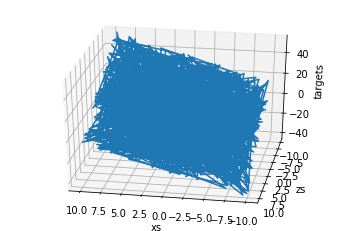

In [49]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Tworzenie zmiennych

In [50]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[-0.05041858]
 [ 0.08443574]]
[-0.06233101]


### Ustawienie learning_rate

In [51]:
learning_rate = 0.001

### Trenowanie modelu

In [52]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

242.1471351427968
227.06738909395887
212.9770791721253
199.8111719611899
187.50890931206754
176.01352725182176
165.27199337636696
155.23476151117418
145.85554250436167
137.0910900912431
128.90100083918634
121.24752724682529
114.09540313256713
107.41168050423417
101.16557715483013
95.32833427907879
89.87308345177193
84.77472235230238
80.00979866024633
75.55640158468368
71.39406052528187
67.5036503961822
63.867303174567944
60.46832526460689
57.29112029437869
54.321116988544176
51.54470178300754
48.94915586977001
46.52259638067847
44.25392143792816
42.13275881707501
40.1494179850319
38.29484529114292
36.56058210402178
34.93872570047315
33.42189272555172
32.00318505471204
30.676157900118362
29.434790013568136
28.27345584818532
27.186899550102922
26.170210659822466
25.218801410848812
24.328385520589464
23.494958375412356
22.714778518206504
21.984350352816605
21.300407985352503
20.659900127634714
20.05997599295098
19.49797211888969
18.97140005630534
18.477934867477668
18.015404380270194
17.5

### Sprawdzenie czy wagi i biases są poprawne
była funkcja f(x,z) = 2x - 3z + 5 + szum

In [53]:
print(weights, biases)

[[ 1.94561172]
 [-2.88657466]] [0.42084992]


### Narysowanie wejść i docelowych wartości

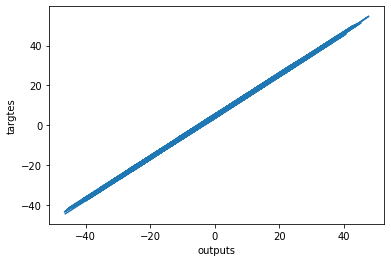

In [54]:

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targtes')
plt.show()